# Collecting the plots

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from numpy.fft import fft

# Potential energy curve

In [12]:
GL_00 = pd.read_csv('outputs/Energy_profile_00_GL.txt',sep='\s+',header=None)
GL_00 = pd.DataFrame(GL_00)
PZ_00 = pd.read_csv('outputs/Energy_profile_00_PZ.txt',sep='\s+',header=None)
PZ_00 = pd.DataFrame(PZ_00)
PW_00 = pd.read_csv('outputs/Energy_profile_00_PW.txt',sep='\s+',header=None)
PW_00 = pd.DataFrame(PW_00)
HF = pd.read_csv('outputs/Energy_profile_HF.txt',sep='\s+',header=None)
HF = pd.DataFrame(HF)

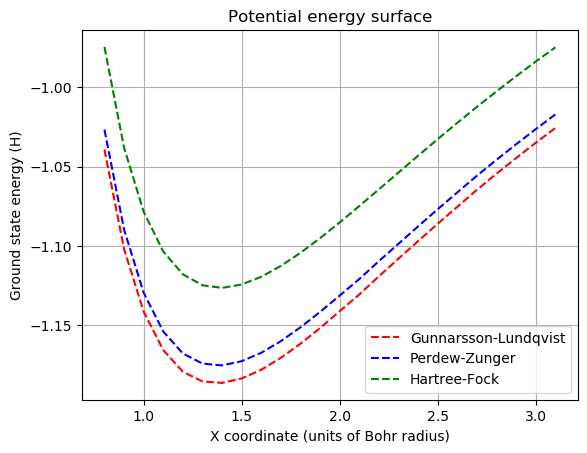

In [20]:
plt.plot(GL_00[0], GL_00[1],'r--', label='Gunnarsson-Lundqvist')
plt.plot(PZ_00[0], PZ_00[1],'b--', label='Perdew-Zunger')
plt.plot(HF[0], HF[1],'g--', label='Hartree-Fock')
plt.grid()
plt.title('Potential energy surface')
plt.xlabel('X coordinate (units of Bohr radius)')
plt.ylabel('Ground state energy (H)')
plt.legend(loc="best")
plt.savefig("outputs/pics/PES.png")

In [17]:
GL_01 = pd.read_csv('outputs/Energy_profile_01_GL.txt',sep='\s+',header=None)
GL_01 = pd.DataFrame(GL_01)
PZ_02 = pd.read_csv('outputs/Energy_profile_02_PZ.txt',sep='\s+',header=None)
PZ_02 = pd.DataFrame(PZ_02)

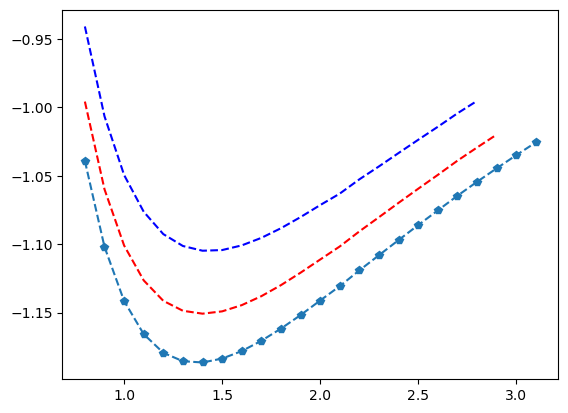

In [19]:
plt.plot(GL_00[0], GL_00[1],'p--', label='Gunnarsson-Lundqvist')
plt.plot(GL_01[0], GL_01[1],'r--', label='Gunnarsson-Lundqvist')
plt.plot(PZ_02[0], PZ_02[1],'b--', label='Perdew-Zunger')

# Ensemble of trajectories

In [17]:

main_dataframe = pd.DataFrame(pd.read_csv(f'outputs/HF_traj/CPMD_HF_0.txt', sep='\s+',header=None))

for i in range(1, 20):
    df = pd.read_csv(f'outputs/HF_traj/CPMD_HF_{i}.txt', sep='\s+',header=None)
    df = pd.DataFrame(df)
    main_dataframe = pd.concat([main_dataframe, df],axis=1)
    N = len(main_dataframe[0])
    ts = 4.3
    times = np.arange(0, N*ts, ts)


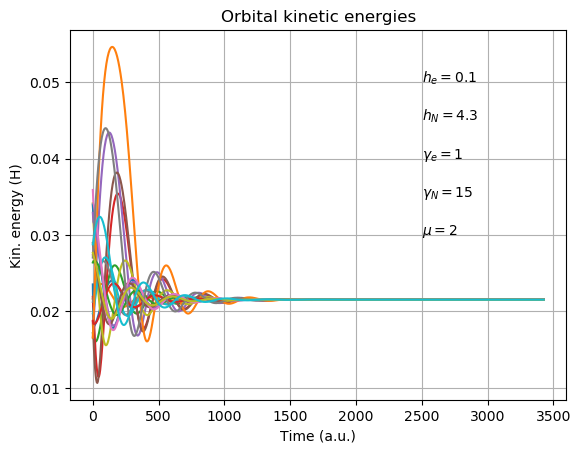

In [28]:
plt.plot(times, main_dataframe[3])
plt.title('Orbital kinetic energies')
plt.xlabel('Time (a.u.)')
plt.grid()
plt.ylabel('Kin. energy (H)')
plt.text(2500, 0.05, "$h_{e}=0.1$")
plt.text(2500, 0.045, "$h_{N}=4.3$")
plt.text(2500, 0.04, "$\gamma_{e}=1$")
plt.text(2500, 0.035, "$\gamma_{N}=15$")
plt.text(2500, 0.03, "$\mu=2$")
plt.savefig("outputs/pics/kin_orb.png")

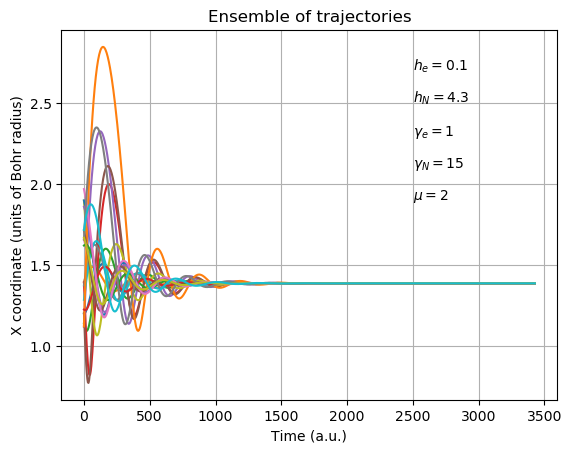

In [23]:
plt.plot(times, main_dataframe[0])
plt.title('Ensemble of trajectories')
plt.xlabel('Time (a.u.)')
plt.grid()
plt.ylabel('X coordinate (units of Bohr radius)')
plt.text(2500, 2.7, "$h_{e}=0.1$")
plt.text(2500, 2.5, "$h_{N}=4.3$")
plt.text(2500, 2.3, "$\gamma_{e}=1$")
plt.text(2500, 2.1, "$\gamma_{N}=15$")
plt.text(2500, 1.9, "$\mu=2$")
plt.savefig("outputs/pics/traj.png")

In [27]:
# Theoretical equilibrium distance:
0.528*1.38809

0.73291152

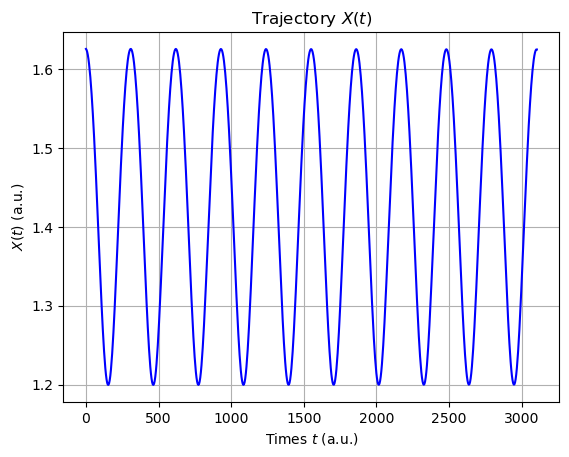

In [55]:
#Devo considerare soltanto un numero intero di periodi, quindi devo scartare la parte iniziale e finale. 

No_damping = pd.DataFrame(pd.read_csv(f'outputs/HF_traj/CPMD_HF_0_freq.txt', sep='\s+',header=None))
N = len(No_damping[0])
ts = 4.3
times = np.arange(0, N*ts, ts)
plt.plot(times, No_damping[0], 'b')
plt.grid()
plt.title(f"Trajectory $X(t)$")
plt.ylabel(f"$X(t)$ (a.u.)")
plt.xlabel(f"Times $t$ (a.u.)")
plt.savefig("outputs/pics/No_damp.png")

In [5]:

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N) #evenly spaced values within an interval 
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1131/3051042678.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, abs(Fourier), 'r', \


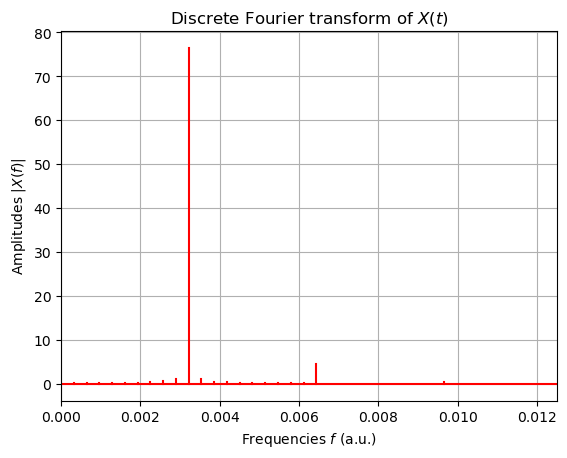

In [56]:

Fourier = DFT(No_damping[0] - np.mean(No_damping[0]))
plt.grid()
N = len(No_damping[0])
n = np.arange(N)
ts = 4.3
sr = 1/ts #Sampling rate 
T = N/sr
freq = n/T 
plt.stem(freq, abs(Fourier), 'r', \
         markerfmt=" ", basefmt="-r")
plt.xlim(0, 0.0125)
plt.title(f"Discrete Fourier transform of $X(t)$")
plt.ylabel(f"Amplitudes $|X(f)|$")
plt.xlabel(f"Frequencies $f$ (a.u.)")
plt.savefig("outputs/pics/Fourier.png")


# Subplot with energies

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4558/3460920529.py:19: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc="best")


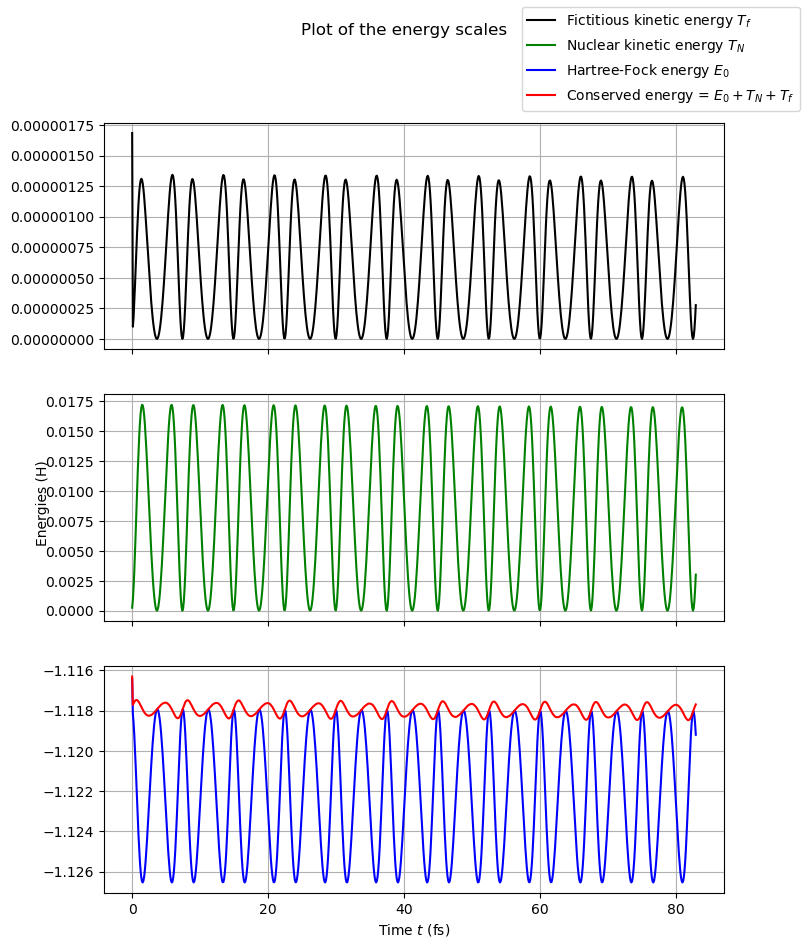

In [12]:
energies = pd.DataFrame(pd.read_csv(f'outputs/HF_traj/CPMD_HF_0.txt', sep='\s+',header=None))
N = len(energies[1])
ts = 4.3*2.4188*1e-2
times = np.arange(0, N*ts, ts)

fig, axs = plt.subplots(nrows=3, sharex=True, sharey=False)
fig.suptitle('Plot of the energy scales')
axs[0].plot(times, energies[5], 'k', label=f'Fictitious kinetic energy $T_f$')
axs[0].grid()
axs[1].plot(times, energies[2], 'g', label=f'Nuclear kinetic energy $T_N$')
axs[1].grid()
axs[2].plot(times, energies[1], 'b', label=f'Hartree-Fock energy $E_0$')
axs[2].plot(times, energies[1] + 0.5*energies[2] + energies[5], 'r', label=f'Conserved energy = $E_0 + T_N + T_f$')
plt.xlabel(f"Time $t$ (fs)")
axs[2].grid()
fig.text(0.04, 0.5, 'Energies (H)', va='center', rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(8)
fig.legend(loc="best")
plt.savefig("outputs/pics/E_scales.png")


# DFT with no damping

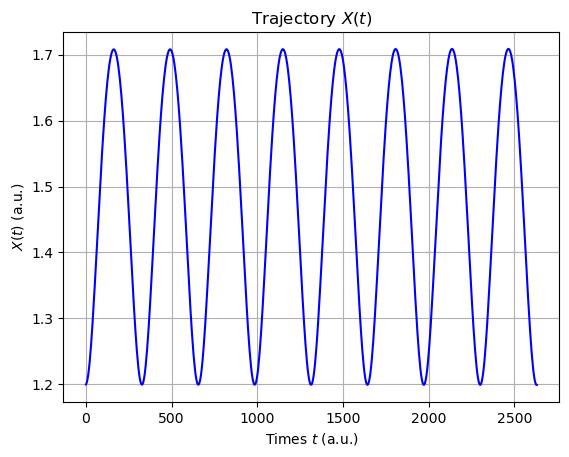

In [2]:
No_damping_DFT = pd.DataFrame(pd.read_csv(f'outputs/MD_CP_DFT_X_energies_freq_PZ.txt', sep='\s+',header=None))
N = len(No_damping_DFT[0])
ts = 4.3
times = np.arange(0, N*ts, ts)
plt.plot(times, No_damping_DFT[0], 'b')
plt.grid()
plt.title(f"Trajectory $X(t)$")
plt.ylabel(f"$X(t)$ (a.u.)")
plt.xlabel(f"Times $t$ (a.u.)")
plt.savefig("outputs/pics/No_damp_DFT.png")

#Tieni presente che l'energia dovrebbe conservarsi, quindi ci sta che i minimi siano a circa 1.2

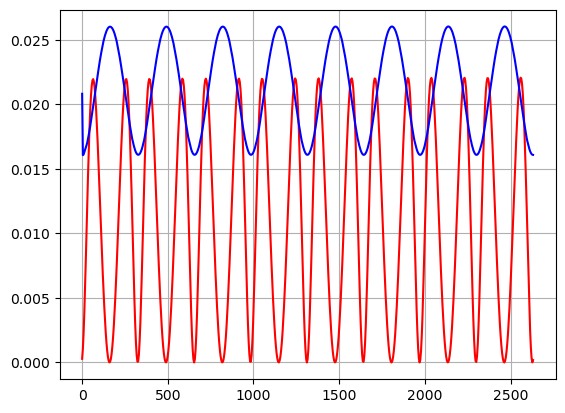

In [7]:
plt.plot(times, 2*No_damping_DFT[2], 'r')
plt.plot(times, No_damping_DFT[3], 'b')
plt.grid()

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1774/2167477216.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, abs(Fourier), 'r', \


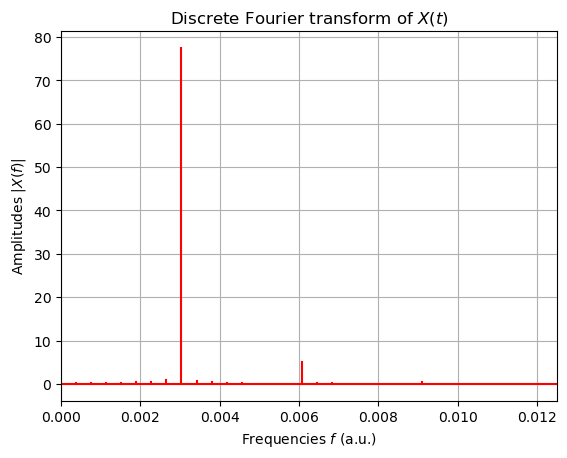

In [6]:
Fourier = DFT(No_damping_DFT[0] - np.mean(No_damping_DFT[0]))
plt.grid()
N = len(No_damping_DFT[0])
n = np.arange(N)
ts = 4.3
sr = 1/ts #Sampling rate 
T = N/sr
freq = n/T 
plt.stem(freq, abs(Fourier), 'r', \
         markerfmt=" ", basefmt="-r")
plt.xlim(0, 0.0125)
plt.title(f"Discrete Fourier transform of $X(t)$")
plt.ylabel(f"Amplitudes $|X(f)|$")
plt.xlabel(f"Frequencies $f$ (a.u.)")
plt.savefig("outputs/pics/Fourier_DFT.png")

In [11]:
4.13*1e+16*8/(4.3*len(No_damping_DFT[0]))

125346181569862.28

In [7]:
np.argmax(abs(Fourier))

8

# DFT with damping

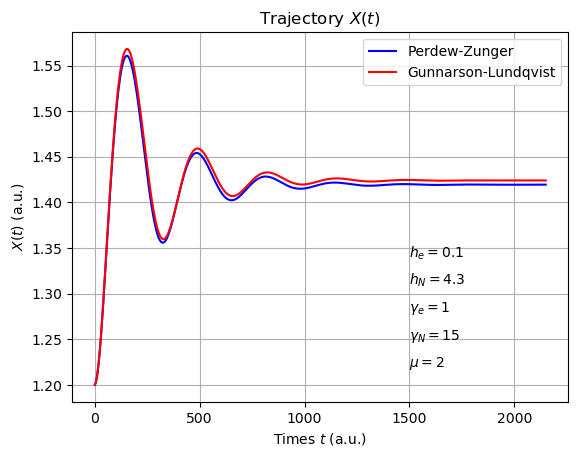

In [34]:
damping_DFT_PZ = pd.DataFrame(pd.read_csv(f'outputs/MD_CP_DFT_X_energies_PZ.txt', sep='\s+',header=None))
damping_DFT_GL = pd.DataFrame(pd.read_csv(f'outputs/MD_CP_DFT_X_energies_GL.txt', sep='\s+',header=None))
N = len(damping_DFT_PZ[0])
ts = 4.3
times = np.arange(0, N*ts, ts)
plt.plot(times, damping_DFT_PZ[0], 'b', label='Perdew-Zunger')
plt.plot(times, damping_DFT_GL[0], 'r', label='Gunnarson-Lundqvist')
plt.grid()
plt.legend(loc="best")
plt.title(f"Trajectory $X(t)$")
plt.ylabel(f"$X(t)$ (a.u.)")
plt.xlabel(f"Times $t$ (a.u.)")
plt.text(1500, 1.34, "$h_{e}=0.1$")
plt.text(1500, 1.31, "$h_{N}=4.3$")
plt.text(1500, 1.28, "$\gamma_{e}=1$")
plt.text(1500, 1.25, "$\gamma_{N}=15$")
plt.text(1500, 1.22, "$\mu=2$")
plt.savefig("outputs/pics/damp_DFT.png")


# Density plot

In [3]:
density = pd.read_csv(f'outputs/density.txt', sep='\s+',header=None)
N_mesh = 100
rho_a = -1.7
rho_b = 1.7
h = (rho_b - rho_a)/N_mesh
rho = np.arange(rho_a, rho_b, h)
z_a = -2.0
z_b = 3.4
h = (z_b - z_a)/N_mesh
z = np.arange(z_a, z_b, h)
Z, RHO = meshgrid(z, rho) # grid of point

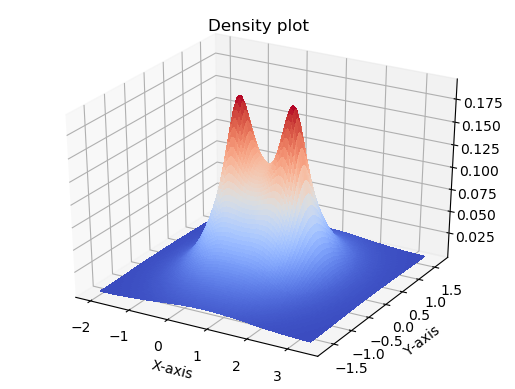

In [69]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Z, RHO, density, rstride=1, cstride=1, 
                      cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title("Density plot")
# Attenzione perché la densità va plottata per una configurazione di equilibrio. 
plt.savefig("outputs/pics/density.png")

# fig, ax = plt.subplots()
# im = plt.imshow(density)

# Car-Parrinello with DFT

In [ ]:
# Qui potrei mettere un confronto tra la traiettoria fatta con HF e una (o più) con DFT. 
# Dobbiamo ottenere anche le due energie cinetiche 

# Conjugate gradient part (CP like)

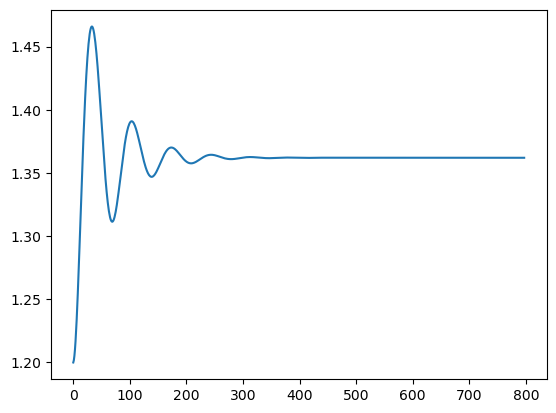

In [10]:
# Qua si può mettere la traittoria col CG e poi fare il plot della normalizzazione (misto)
CG_CP = pd.read_csv(f'outputs/CG_CP_X_energies.txt', sep='\s+',header=None)
CG_CP = pd.DataFrame(CG_CP)
plt.plot(CG_CP[0])

In [8]:
prod_scal = pd.read_csv(f'outputs/scal_prod.txt', sep='\s+',header=None)
prod_scal = pd.DataFrame(prod_scal)

# Conjugate gradient (shake)

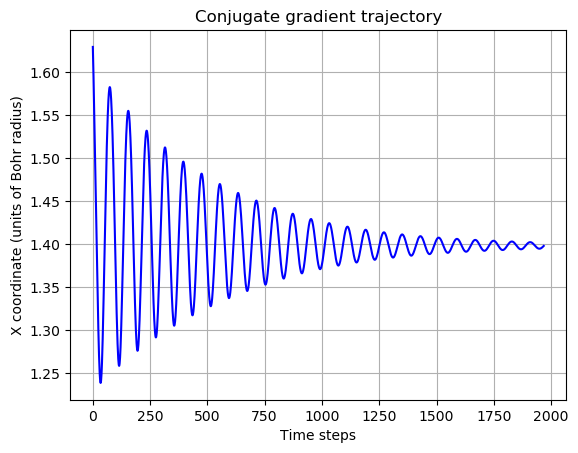

In [3]:
CG_shake = pd.read_csv(f'outputs/CG_shake_X_energies.txt', sep='\s+',header=None)
CG_shake = pd.DataFrame(CG_shake)
plt.plot(CG_shake[0], 'b')
plt.title('Conjugate gradient trajectory')
plt.xlabel('Time steps')
plt.grid()
plt.ylabel('X coordinate (units of Bohr radius)')
plt.savefig('outputs/pics/CG_traj.png')

In [10]:
Fourier = np.fft.fft(CG_shake[0])

# extract real part
x = [ele.real for ele in Fourier]
# extract imaginary part
y = [ele.imag for ele in Fourier]

In [16]:
y

[1.049160758270773e-14,
 -4.532855370087594,
 -3.8575424712948188,
 -2.8261699923962986,
 -2.120185072432168,
 -1.5663622406529665,
 -1.1370491909681135,
 -0.8182783567608372,
 -0.48808383282759227,
 -0.25010478618345755,
 0.015784619902873054,
 0.2960590522084247,
 0.5379289424765101,
 0.8502280634962924,
 1.136726374148827,
 1.4982900805237298,
 1.9377372475300274,
 2.440786830566891,
 3.115226023374322,
 4.033132119531148,
 5.2474901489205035,
 7.348005511756234,
 10.604055959010086,
 17.36954704686075,
 30.866686086339243,
 -6.143088749671147,
 -15.425284814847249,
 -9.801944463181314,
 -7.554605357967902,
 -6.161115067104056,
 -5.26563562196638,
 -4.648822322287477,
 -4.160092729350474,
 -3.792761316512013,
 -3.500901304855103,
 -3.245159292739129,
 -3.043980648043204,
 -2.876192888085531,
 -2.724234244162788,
 -2.610501008382019,
 -2.501051720793029,
 -2.419928203165008,
 -2.346992625540354,
 -2.303110797089948,
 -2.2817288591821976,
 -2.2982318274559836,
 -2.3752538118255426,
 -

# BOMD with shake

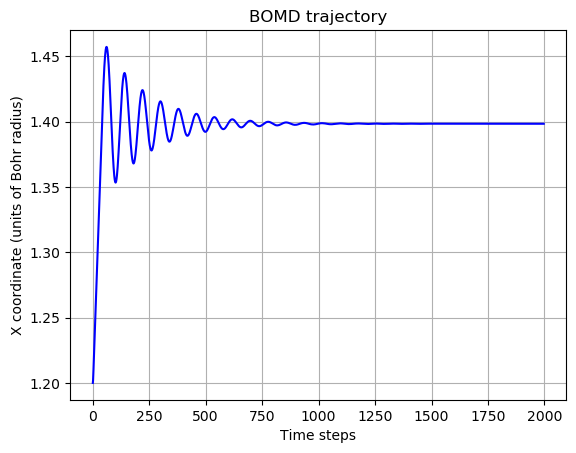

In [2]:
BOMD = pd.read_csv(f'outputs/MD_BO_X_energies.txt', sep='\s+',header=None)
BOMD = pd.DataFrame(BOMD)
plt.plot(BOMD[0], 'b')
plt.title('BOMD trajectory')
plt.xlabel('Time steps')
plt.grid()
plt.ylabel('X coordinate (units of Bohr radius)')
plt.savefig("outputs/pics/BOMD_traj.png")

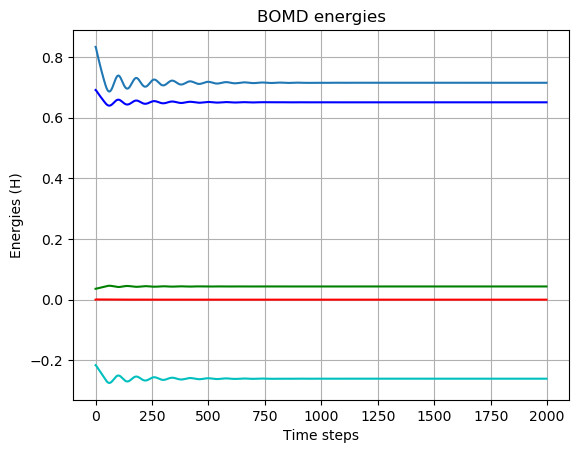

In [3]:
nucl_nucl = [1/BOMD[0][i] for i in range(len(BOMD[0]))]

plt.plot(BOMD[2], 'r')
plt.plot(BOMD[3], 'g')
plt.plot(BOMD[4], 'b')
plt.plot(BOMD[5], 'c')
plt.plot(nucl_nucl)
plt.title('BOMD energies')
plt.xlabel('Time steps')
plt.grid()
plt.ylabel('Energies (H)')
plt.savefig("outputs/pics/BOMD_en.png")

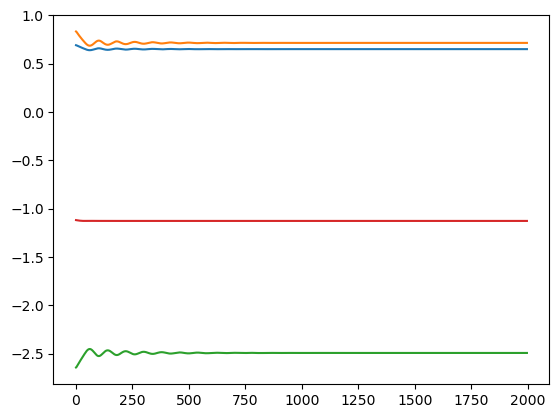

In [7]:
plt.plot(BOMD[4])
plt.plot(nucl_nucl)
plt.plot(BOMD[6])
plt.plot(BOMD[1])
# quindi attenzione perché devo escludere l'energia cinetica dei nuclei...
# Sì, perché la E0 non è altro che l'energia elettronica...

In [5]:
BOMD[4] + BOMD[6] + nucl_nucl

0      -1.117956
1      -1.118144
2      -1.118505
3      -1.118980
4      -1.119440
          ...   
1993   -1.126521
1994   -1.126521
1995   -1.126521
1996   -1.126521
1997   -1.126521
Length: 1998, dtype: float64

In [6]:
BOMD[1]

0      -1.11796
1      -1.11815
2      -1.11851
3      -1.11898
4      -1.11945
         ...   
1993   -1.12652
1994   -1.12652
1995   -1.12652
1996   -1.12652
1997   -1.12652
Name: 1, Length: 1998, dtype: float64